In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# الف

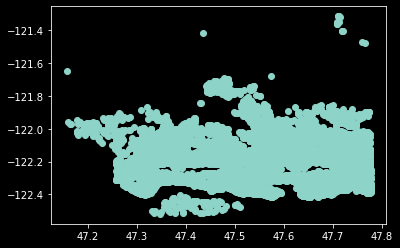

In [267]:
df = pd.read_csv("D:\\Courses\\University Courses\\ML\\Homework\\HW1_ML\\p2_dataset\\data2_house_data.csv")
plt.scatter(df['lat'], df['long'])
plt.show()

# ب

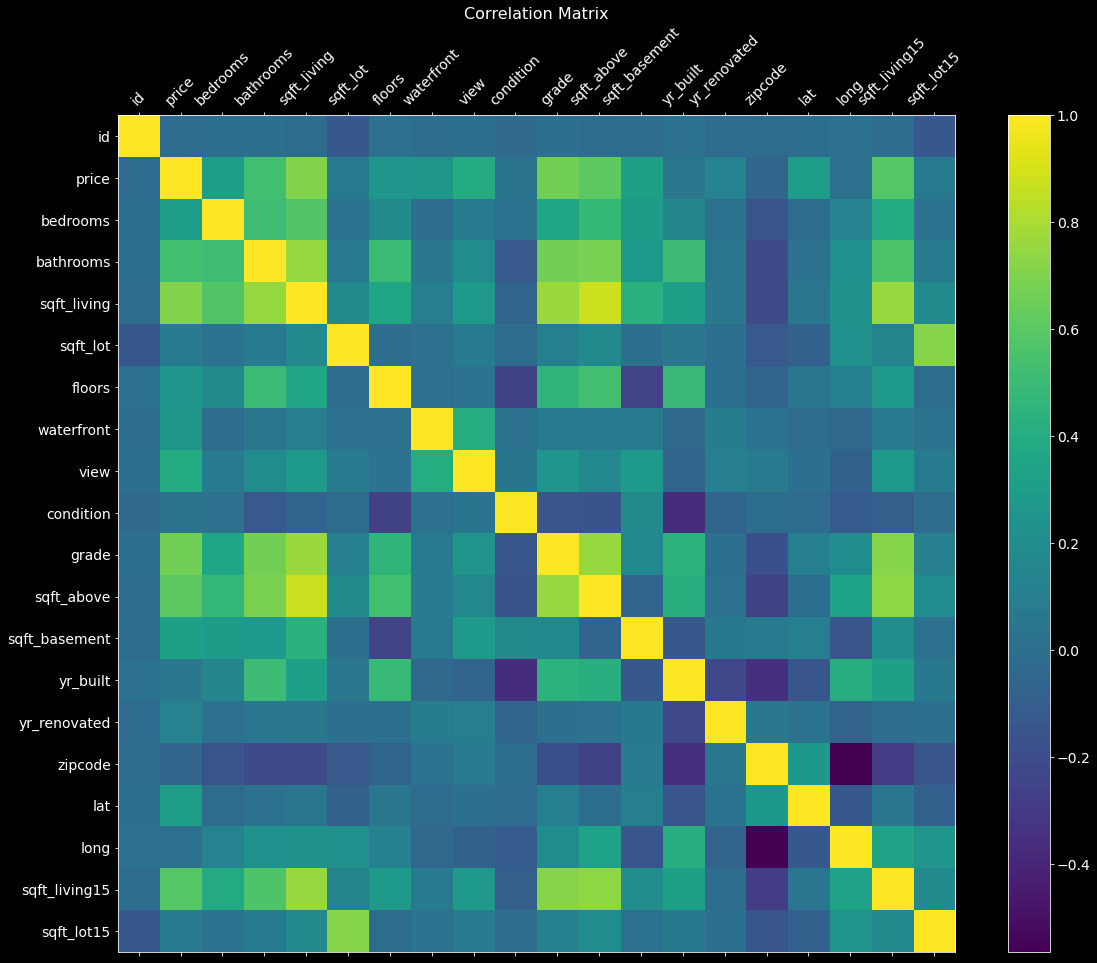

In [265]:
plt.style.use(['dark_background'])
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000,-0.017,0.001,0.005,-0.012,-0.132,0.019,-0.003,0.012,-0.024,0.008,-0.011,-0.005,0.021,-0.017,-0.008,-0.002,0.021,-0.003,-0.139
price,-0.017,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.082
bedrooms,0.001,0.308,1.000,0.516,0.577,0.032,0.175,-0.007,0.080,0.028,0.357,0.478,0.303,0.154,0.019,-0.153,-0.009,0.129,0.392,0.029
bathrooms,0.005,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506,0.051,-0.204,0.025,0.223,0.569,0.087
sqft_living,-0.012,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.719
floors,0.019,0.257,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489,0.006,-0.059,0.050,0.125,0.280,-0.011
waterfront,-0.003,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.086,0.031
view,0.012,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.104,0.085,0.006,-0.078,0.280,0.073
condition,-0.024,0.036,0.028,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061,0.003,-0.015,-0.107,-0.093,-0.003


# ج

### میتوان ویژگی هایی که همبستگی کمی با قیمت دارند را حذف کرد زیرا قیمت خیلی ربطی به مقدار آن ها نخواهد داشت
### پس ویژگی های زیر را میتوان حذف کرد.
### id, sqft_lot, condition, yr_built, yr_renovated, zipcode, long, sqft_lot15

# د

In [133]:
def find_the_best_learning_rate(degree, iteration_count, error_function, X):
    error_per_learning_rate = []
    for learning_rate in (1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001, 0.000005, 0.000001, 0.0000005, 0.0000001):
        m = len(x_train)
        theta = np.random.randn(degree+1, 1)*np.sqrt(1/(degree+1))
        np_y_train = y_train.to_numpy()
        np_y_train = np.reshape(np_y_train, (len(np_y_train), 1))
        h = np.dot(theta.T, X)
        for i in range(iteration_count):
            if error_function == 'MSE':
                d_theta = 2/m * np.sum((h - np_y_train.T), axis=1) * np.sum(X, axis=1)
                d_theta = d_theta.reshape(degree+1, 1)
            elif error_function == 'RMSE':
                d_theta = 2/m * np.sum((h - np_y_train.T), axis=1) * np.sum(X, axis=1) * 1/2 * (((1/(2*m)) * np.sum(((h - np_y_train.T)**2), axis=1))**(-1/2))
                d_theta = d_theta.reshape(degree+1, 1)
            elif error_function == 'MAE':
                temp = np.greater(h, np_y_train.T)
                coef = [1 if element else -1 for element in temp.T]
                temp_X = X * coef
                d_theta = 1/m * np.sum(temp_X, axis=1)
                d_theta = d_theta.reshape(degree+1, 1)
#             print(f'theta for learning rate {learning_rate} is {theta}')
            theta = theta - learning_rate * d_theta
            h = np.dot(theta.T, X)
            

        if error_function == 'MSE':
            final_error = (1/m) * np.sum(((h - np_y_train.T)**2), axis=1)

        elif error_function == 'RMSE':
            final_error = ((1/m) * np.sum(((h - np_y_train.T)**2), axis=1))**(1/2)
        elif error_function == 'MAE':
            final_error = (1/m) * np.sum((abs(h - np_y_train.T)), axis=1)
        if final_error < 200000:
            error_per_learning_rate.append([final_error, learning_rate])
        
        np_error_per_learning_rate = np.array(error_per_learning_rate)
#     plt.style.use(['dark_background'])
#     plt.plot(np_error_per_learning_rate[:,1], np_error_per_learning_rate[:,0], '-o')
#     plt.title(f'learning rate for degree = {degree}, iteration count = {iteration_count}, cost function = {error_function}')
#     plt.xlabel('learning rate')
#     plt.ylabel('final error')
#     plt.show()
#     print(np_error_per_learning_rate)
    minimum_index = np.where(np_error_per_learning_rate == min(np_error_per_learning_rate[:,0]))
    return np_error_per_learning_rate[minimum_index[0][0], minimum_index[1][0]-1]

In [314]:
def gradien_descent(degree, iteration_count, X, X_TEST,error_function = 'RMSE'):
    print(f'working on degree = {degree}, iteration count = {iteration_count}, error function = {error_function}')
    errors = []
    learning_rate = 0.05#find_the_best_learning_rate(degree, iteration_count, error_function, X)
    print(f'the best learning rate = {learning_rate}')
    m = len(x_train)
    m_test = len(x_test)
    theta_changes = []
    theta = np.ones((degree+1, 1))*np.sqrt(1/(degree+1))
    
    np_y_train = y_train.to_numpy()
    np_y_train = np.reshape(np_y_train, (len(np_y_train), 1))
    
    np_y_test = y_test.to_numpy()
    np_y_test = np.reshape(np_y_test, (len(np_y_test), 1))
    
    h = np.dot(theta.T, X)
    for i in range(iteration_count):
        
        if error_function == 'MSE':
            d_theta = 2/m * np.sum((h - np_y_train.T)*X, axis=1)
            d_theta = d_theta.reshape(degree+1, 1)
        elif error_function == 'RMSE':
            d_theta = 2/m * np.sum((h - np_y_train.T), axis=1) * np.sum(X, axis=1) * 1/2 * (((1/(2*m)) * np.sum(((h - np_y_train.T)**2), axis=1))**(-1/2))
            d_theta = d_theta.reshape(degree+1, 1)
        elif error_function == 'MAE':
            temp = np.greater(h, np_y_train.T)
            coef = [1 if element else -1 for element in temp.T]
            temp_X = X * coef
            d_theta = 1/m * np.sum(temp_X, axis=1)
            d_theta = d_theta.reshape(degree+1, 1)

        theta = theta - learning_rate * d_theta
        theta_changes.append(learning_rate * d_theta)
        h = np.dot(theta.T, X)
        if error_function == 'MSE':
            error = (1/m) * np.sum(((h - np_y_train.T)**2), axis=1)
        elif error_function == 'RMSE':
            error = ((1/m) * np.sum(((h - np_y_train.T)**2), axis=1))**(1/2)
        elif error_function == 'MAE':
            error = (1/m) * np.sum((abs(h - np_y_train.T)), axis=1)
        errors.append([i, float(error)])
        
    print(f'final training error = {error}') 
    np_errors = np.array(errors)
    
    # Calculating test results ... 
    
        
    test_result = np.dot(theta.T, X_TEST)
    if error_function == 'MSE':
        test_error = (1/m_test) * np.sum(((test_result - np_y_test.T)**2), axis=1)
    elif error_function == 'RMSE':
        test_error = ((1/m_test) * np.sum(((test_result - np_y_test.T)**2), axis=1))**(1/2)
    elif error_function == 'MAE':
        test_error = (1/m_test) * np.sum((abs(test_result - np_y_test.T)), axis=1)
    
    print(f'test error is {test_error}')
    
    # plotting training errors
    plt.style.use(['dark_background'])
    plt.plot(np_errors[:,0], np_errors[:,1])
    plt.title(f'degree = {degree}, iteration count = {iteration_count}, cost function = {error_function}')
    plt.xlabel('iteration count')
    plt.ylabel('error')
    plt.show()
    
    np_theta_changes = np.array(theta_changes)
    np_theta_changes=np_theta_changes.transpose(2,0,1).reshape(degree+1,-1)
    
    plt.plot(range(iteration_count), np_theta_changes[0,:])
#     plt.legend(range(degree+1))
    plt.title('theta changes')
    plt.xlabel('iteration count')
    plt.ylabel('theta changes')
    plt.show()
    return test_result

In [234]:
def normalize_dataframe(input_df):
    min_df = input_df.min(axis = 0)
    max_df = input_df.max(axis = 0)
    avg_df = input_df.mean(axis = 0)
    result_df = input_df - avg_df
    result_df /= (max_df - min_df)
    return result_df
    

### با استفاده از کل ویژگی ها مدل آموزش داده شده است. ابتدا داده ها نرمال سازی شدند و خطا هایی که گزارش شده نیز برای داده های نرمال است. سپس  خروجی پیشبینی شده دوباره به مقیاس اولیه قیمت ها برده شد و مقدار خطا برای داده های تست محاسبه شد. مقادیر پارامتر ها نیز چاپ شده اند.

working on degree = 18, iteration count = 1000, error function = MSE
the best learning rate = 0.05
final training error = [0.00111188]
test error is [0.00194146]


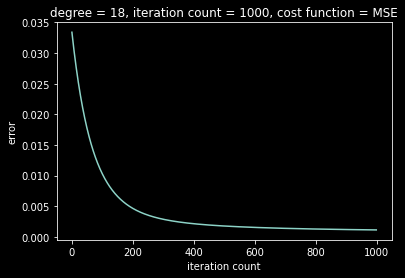

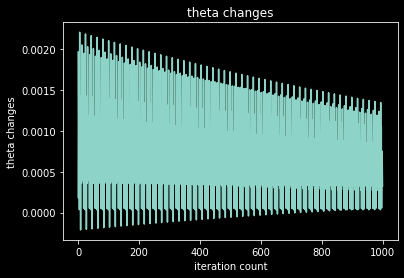

[[137403.9850331  448587.93424762 945146.50743594 ... 633553.51906562
  457403.23153412 -73413.63908346]]
final test error: [224703.45003305]


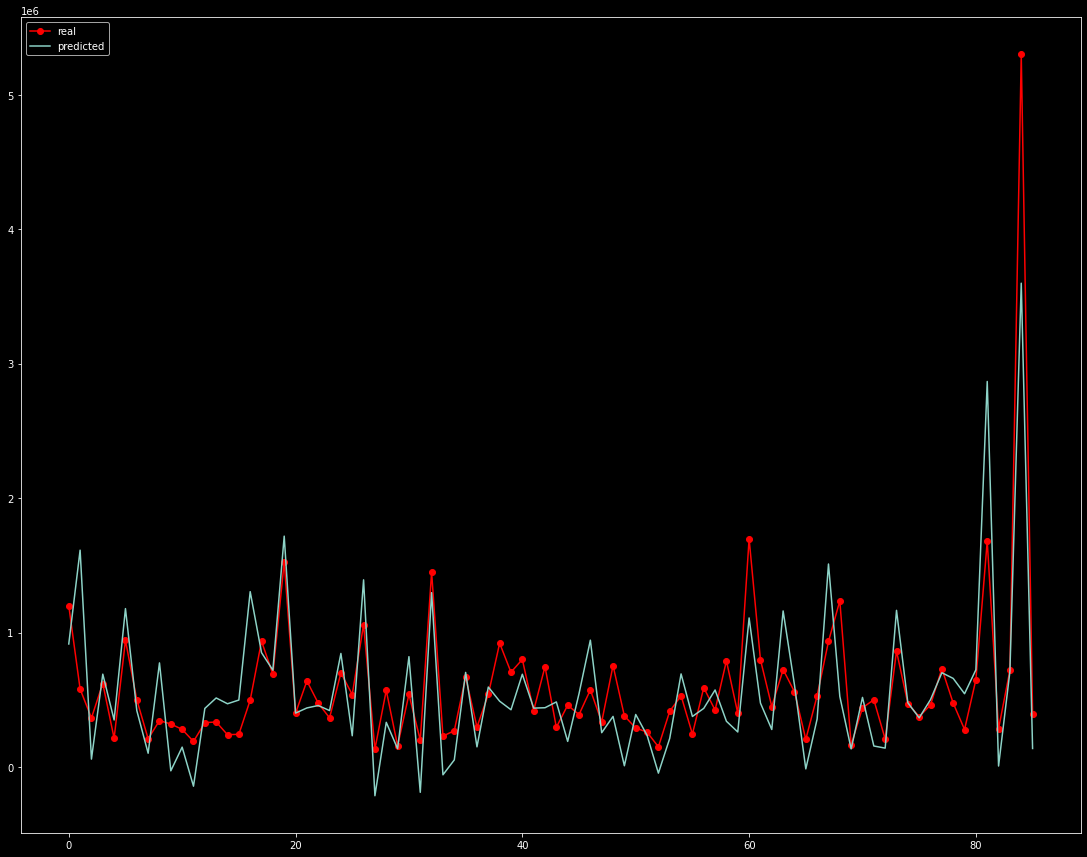

In [315]:
X = df.copy()
X = X.sample(frac=1).reset_index(drop=True)
# modified_X = X.drop(['id', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'date'], axis = 1)
modified_X = X.drop(['date'], axis = 1)

train = modified_X.iloc[0:int(len(modified_X)*80/100) ,:]
test = modified_X.iloc[int(len(modified_X)*80/100): ,:]
#x_train, y_train = train[['bathrooms', 'sqft_living', 'grade', 'sqft_above']], train['price']
x_train, y_train = train, train['price']
x_train = x_train.drop(['price'], axis=1)
# x_test, y_test = test[['bathrooms', 'sqft_living', 'grade', 'sqft_above']], test['price']
x_test, y_test = test, test['price']
x_test = x_test.drop(['price'], axis=1)
raw_y_test = y_test.copy()
normal_x_train = normalize_dataframe(x_train)
normal_x_test = normalize_dataframe(x_test)
y_train = normalize_dataframe(y_train)
y_test = normalize_dataframe(y_test) 
np_X = normal_x_train.to_numpy()
np_X_test = normal_x_test.to_numpy()
test_result = gradien_descent(degree=len(x_train.columns)-1,iteration_count=1000 ,X=np_X.T, X_TEST=np_X_test.T,error_function='MSE')
min_y_test = raw_y_test.min(axis = 0)
max_y_test = raw_y_test.max(axis = 0)
avg_y_test = raw_y_test.mean(axis = 0)
test_result *= (max_y_test - min_y_test)
test_result += avg_y_test
print(test_result)
final_test_error = ((1/len(y_test)) * np.sum(abs(test_result - raw_y_test.to_numpy().T), axis=1))
print(f'final test error: {final_test_error}')
plot_data = pd.DataFrame()
plot_data['real'] = raw_y_test.T
plot_data['predicted'] = test_result.T
plot_data = plot_data.sample(frac=0.02).reset_index(drop=True)
plt.figure(figsize=(19,15))
plt.plot(plot_data.index.to_numpy(), plot_data['real'], 'r-o')
plt.plot(plot_data.index.to_numpy(), plot_data['predicted'], '-')
plt.legend(['real', 'predicted'])
plt.show()

working on degree = 10, iteration count = 1000, error function = MSE
the best learning rate = 0.05
final training error = [0.00096426]
test error is [0.00159611]


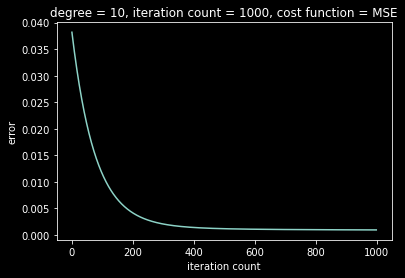

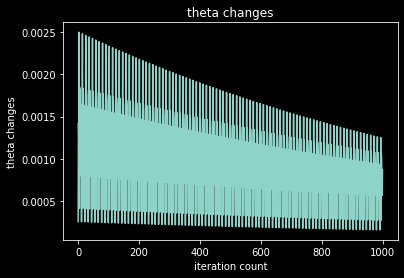

final test error: [187913.63846852]


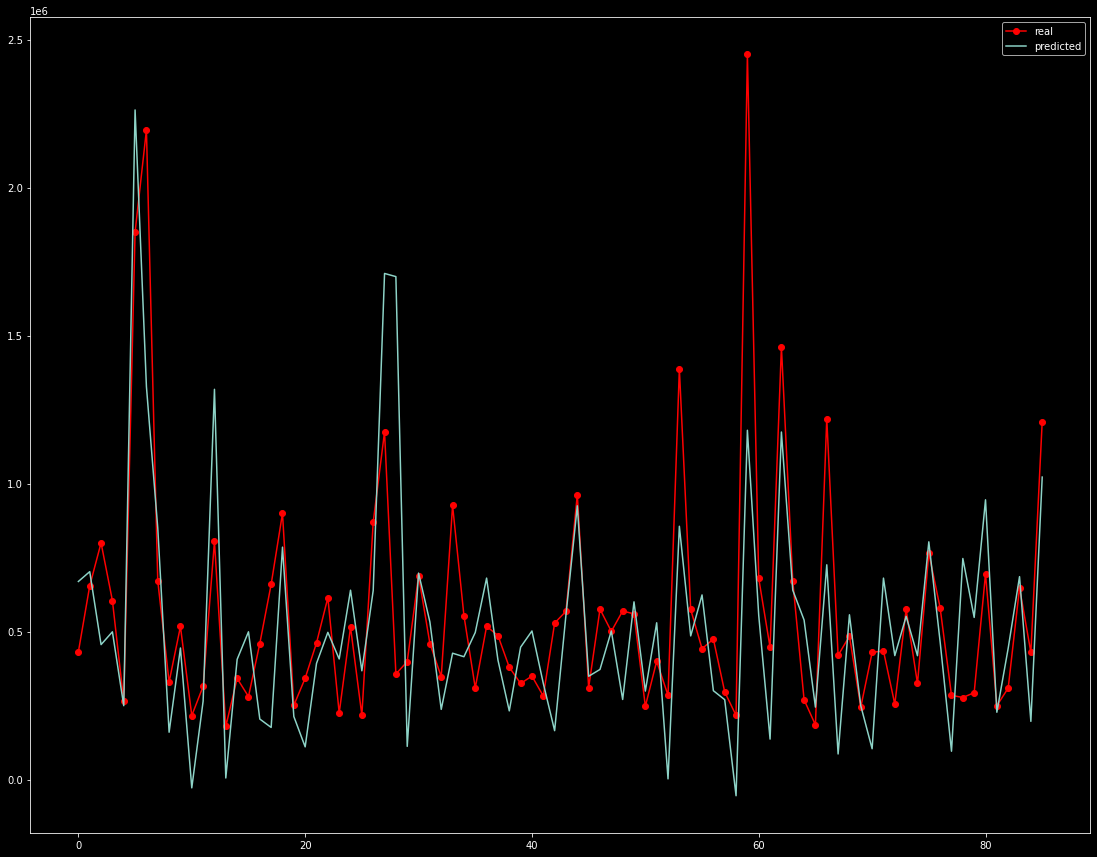

In [316]:
X = df.copy()
X = X.sample(frac=1).reset_index(drop=True)
modified_X = X.drop(['id', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'date'], axis = 1)
# modified_X = X.drop(['date'], axis = 1)

train = modified_X.iloc[0:int(len(modified_X)*80/100) ,:]
test = modified_X.iloc[int(len(modified_X)*80/100): ,:]
# x_train, y_train = train[['bathrooms', 'sqft_living', 'grade', 'sqft_above']], train['price']
x_train, y_train = train, train['price']
x_train = x_train.drop(['price'], axis=1)
# x_test, y_test = test[['bathrooms', 'sqft_living', 'grade', 'sqft_above']], test['price']
x_test, y_test = test, test['price']
x_test = x_test.drop(['price'], axis=1)
raw_y_test = y_test.copy()
normal_x_train = normalize_dataframe(x_train)
normal_x_test = normalize_dataframe(x_test)
y_train = normalize_dataframe(y_train)
y_test = normalize_dataframe(y_test) 
np_X = normal_x_train.to_numpy()
np_X_test = normal_x_test.to_numpy()
test_result = gradien_descent(degree=len(x_train.columns)-1,iteration_count=1000 ,X=np_X.T, X_TEST=np_X_test.T,error_function='MSE')
min_y_test = raw_y_test.min(axis = 0)
max_y_test = raw_y_test.max(axis = 0)
avg_y_test = raw_y_test.mean(axis = 0)
test_result *= (max_y_test - min_y_test)
test_result += avg_y_test
final_test_error = ((1/len(y_test)) * np.sum(abs(test_result - raw_y_test.to_numpy().T), axis=1))
print(f'final test error: {final_test_error}')
plot_data = pd.DataFrame()
plot_data['real'] = raw_y_test.T
plot_data['predicted'] = test_result.T
plot_data = plot_data.sample(frac=0.02).reset_index(drop=True)
plt.figure(figsize=(19,15))
plt.plot(plot_data.index.to_numpy(), plot_data['real'], 'r-o')
plt.plot(plot_data.index.to_numpy(), plot_data['predicted'], '-')
plt.legend(['real', 'predicted'])
plt.show()

# ه

In [310]:
def normal_equation(X, X_TEST, degree, iteration_count, error_function):
    print(f'working on degree = {degree}, iteration count = {iteration_count}, error function = {error_function}')
    m = len(x_train)
    m_test = len(y_test)
    
    np_y_train = y_train.to_numpy()
    np_y_train = np.reshape(np_y_train, (len(np_y_train), 1))
    np_y_test = y_test.to_numpy()
    np_y_test = np.reshape(np_y_test, (len(np_y_test), 1))
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, np_y_train))
    h = np.dot(X, theta)
    
    if error_function == 'MSE':
        error = (1/m) * np.sum(((h.T - np_y_train.T)**2), axis=1)
    elif error_function == 'RMSE':
        error = ((1/m) * np.sum(((h.T - np_y_train.T)**2), axis=1))**(1/2)
    elif error_function == 'MAE':
        error = (1/m) * np.sum((abs(h.T - np_y_train.T)), axis=1)
        
    print(f'final training error = {error}') 
#     print(X_TEST.shape, theta.shape)
    test_result = np.dot(X_TEST, theta)
    print(np_y_test.shape)
    if error_function == 'MSE':
        test_error = (1/m_test) * np.sum(((test_result.T - np_y_test.T)**2), axis=1)
    elif error_function == 'RMSE':
        test_error = ((1/m_test) * np.sum(((test_result.T - np_y_test.T)**2), axis=1))**(1/2)
    elif error_function == 'MAE':
        test_error = (1/m_test) * np.sum((abs(test_result.T - np_y_test.T)), axis=1)
    
    print(f'test error is {test_error}')
    return test_result


working on degree = 9, iteration count = 1000, error function = MAE
final training error = [154011.19067684]
(4323, 1)
test error is [155270.98965436]


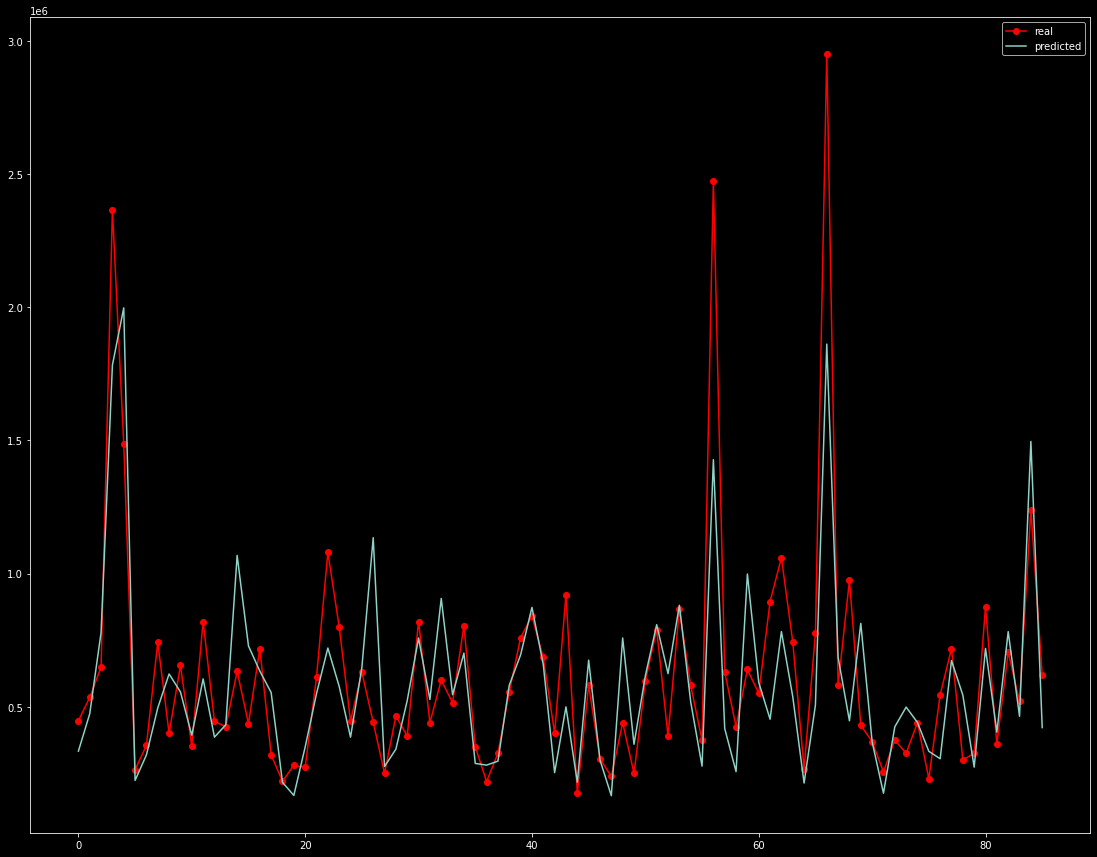

In [312]:
X = df.copy()
modified_X = X.drop(['id', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'date', 'sqft_above'], axis = 1)
# modified_X = X.drop(['date'], axis = 1)

train = modified_X.iloc[0:int(len(modified_X)*80/100) ,:]
test = modified_X.iloc[int(len(modified_X)*80/100): ,:]
# x_train, y_train = train[['bathrooms', 'sqft_living', 'grade']], train['price']
x_train, y_train = train, train['price']
x_train = x_train.drop(['price'], axis=1)

# x_test, y_test = test[['bathrooms', 'sqft_living', 'grade']], test['price']
x_test, y_test = test, test['price']
x_test = x_test.drop(['price'], axis=1)
raw_y_test = y_test.copy()
# normal_x_train = normalize_dataframe(x_train)
# normal_x_test = normalize_dataframe(x_test)
# y_train = normalize_dataframe(y_train)
# y_test = normalize_dataframe(y_test) 
np_X = x_train.to_numpy()#normal_x_train.to_numpy()
np_X_test = x_test.to_numpy()


normal_equation_prediction = normal_equation(X=np_X, X_TEST=np_X_test, degree=len(x_train.columns)-1,iteration_count=1000 ,error_function='MAE')
normal_equation_plot_data = pd.DataFrame()
normal_equation_plot_data['real'] = y_test
normal_equation_plot_data['predicted'] = normal_equation_prediction

normal_equation_plot_data = normal_equation_plot_data.sample(frac=0.02).reset_index(drop=True)
plt.figure(figsize=(19,15))
plt.plot(normal_equation_plot_data.index.to_numpy(), normal_equation_plot_data['real'], 'r-o')
plt.plot(normal_equation_plot_data.index.to_numpy(), normal_equation_plot_data['predicted'], '-')
plt.legend(['real', 'predicted'])
plt.show()


working on degree = 18, iteration count = 1000, error function = MAE
final training error = [1172305.70027274]
(4323, 1)
test error is [1109142.56510042]


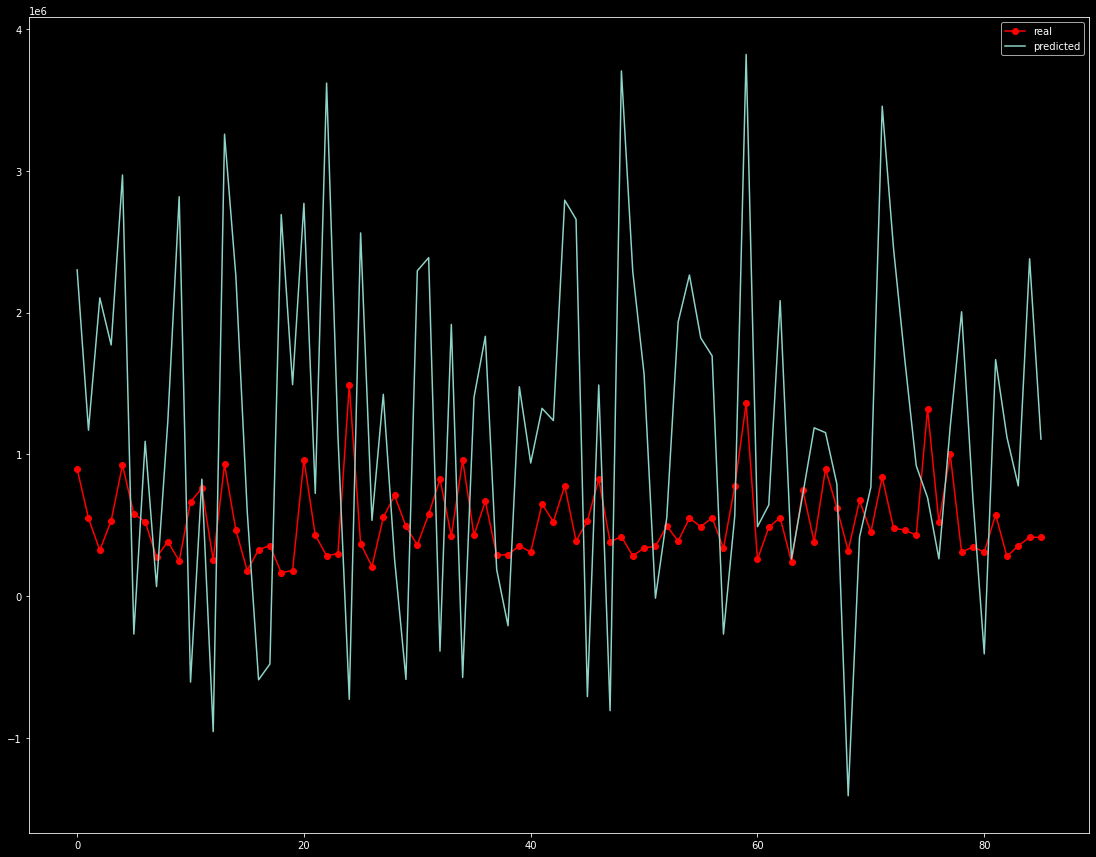

In [313]:
X = df.copy()
# modified_X = X.drop(['id', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'date', 'sqft_above'], axis = 1)
modified_X = X.drop(['date'], axis = 1)

train = modified_X.iloc[0:int(len(modified_X)*80/100) ,:]
test = modified_X.iloc[int(len(modified_X)*80/100): ,:]
# x_train, y_train = train[['bathrooms', 'sqft_living', 'grade']], train['price']
x_train, y_train = train, train['price']
x_train = x_train.drop(['price'], axis=1)

# x_test, y_test = test[['bathrooms', 'sqft_living', 'grade']], test['price']
x_test, y_test = test, test['price']
x_test = x_test.drop(['price'], axis=1)
raw_y_test = y_test.copy()
# normal_x_train = normalize_dataframe(x_train)
# normal_x_test = normalize_dataframe(x_test)
# y_train = normalize_dataframe(y_train)
# y_test = normalize_dataframe(y_test) 
np_X = x_train.to_numpy()#normal_x_train.to_numpy()
np_X_test = x_test.to_numpy()


normal_equation_prediction = normal_equation(X=np_X, X_TEST=np_X_test, degree=len(x_train.columns)-1,iteration_count=1000 ,error_function='MAE')
normal_equation_plot_data = pd.DataFrame()
normal_equation_plot_data['real'] = y_test
normal_equation_plot_data['predicted'] = normal_equation_prediction

normal_equation_plot_data = normal_equation_plot_data.sample(frac=0.02).reset_index(drop=True)
plt.figure(figsize=(19,15))
plt.plot(normal_equation_plot_data.index.to_numpy(), normal_equation_plot_data['real'], 'r-o')
plt.plot(normal_equation_plot_data.index.to_numpy(), normal_equation_plot_data['predicted'], '-')
plt.legend(['real', 'predicted'])
plt.show()